In [1]:
import numpy as np
import pandas as pd
import nibabel as nib
import matplotlib.pyplot as plt
import benchmark_utils as utils
import warnings
from utils import *
from matplotlib.pyplot import *
from pathlib import Path, PurePath
from nilearn import image, plotting
from nilearn.input_data import NiftiMasker, NiftiLabelsMasker
from nilearn.glm.first_level import FirstLevelModel
from load_confounds import Params9
from sklearn.model_selection import KFold
from nilearn.decoding import Decoder
from IPython.display import Markdown, display

In [2]:
subj = 'sub-01'
path = '/home/SRastegarnia/hcptrt_decoding_Shima/DATA/cneuromod/hcptrt/sub-01/fmriprep-20.1.0/'
task_dir = '/home/SRastegarnia/hcptrt_decoding_Shima/hcptrt_decoding'

task_labels = ['wm', 'motor', 'language', 'gambling', 'social', 'relational', 'emotion']
warnings.filterwarnings('ignore')

### Results for extended decoding benchmark including all trial types:

**Task: wm**

0-Back_Body 0.9
0-Back_Face 0.9
0-Back_Place 0.89
0-Back_Tools 0.87
2-Back_Body 0.89
2-Back_Face 0.85
2-Back_Place 0.83
2-Back_Tools 0.82
Cue_nan 0.9
countdown_nan 0.96
mean value: 0.88 



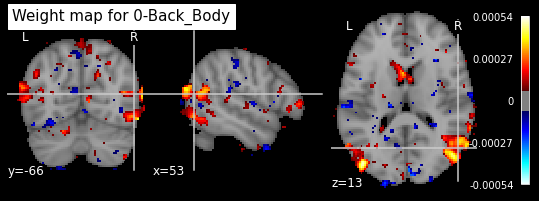

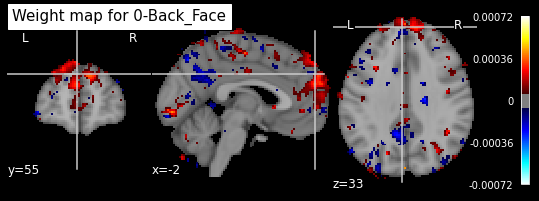

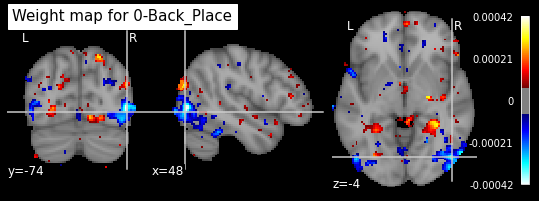

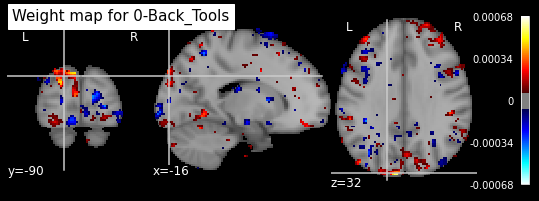

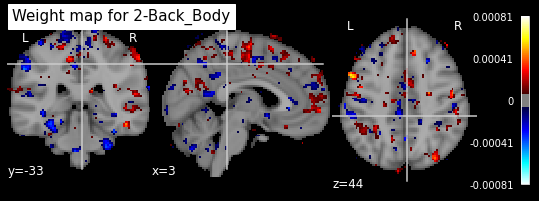

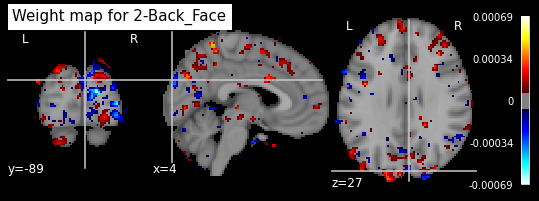

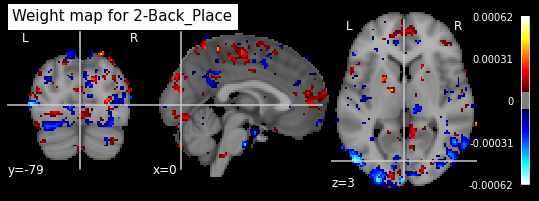

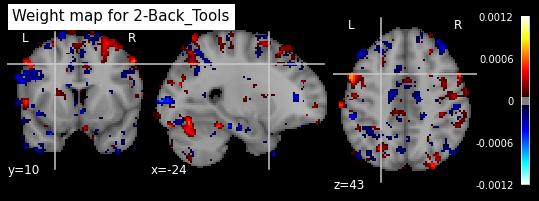

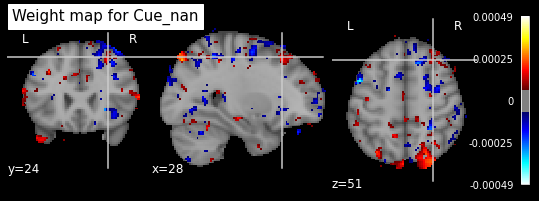

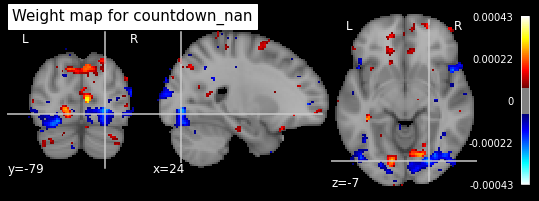

**Task: motor**

countdown 0.94
cross_fixation 0.97
new_bloc_left_foot 0.91
new_bloc_left_hand 0.91
new_bloc_right_foot 0.92
new_bloc_right_hand 0.97
new_bloc_tongue 0.94
response_left_foot 0.96
response_left_hand 0.88
response_right_foot 0.93
response_right_hand 0.89
response_tongue 0.86
mean value: 0.92 



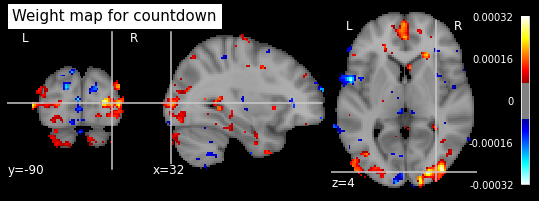

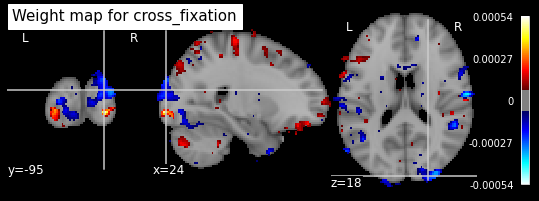

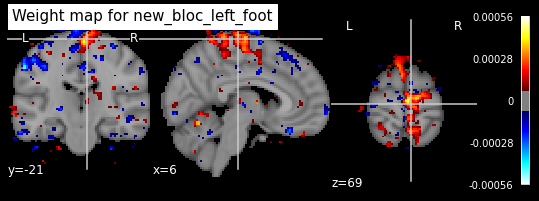

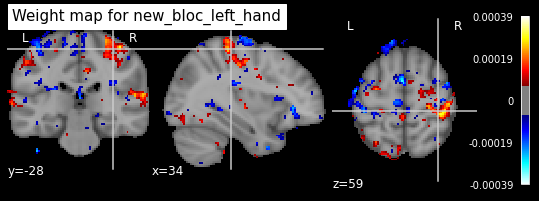

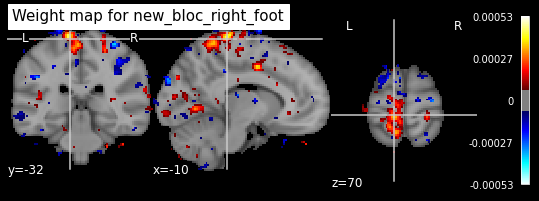

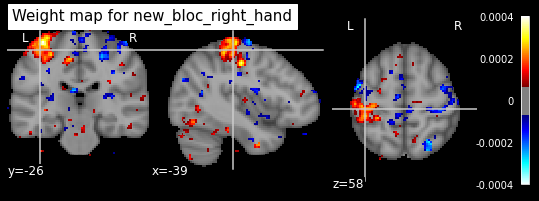

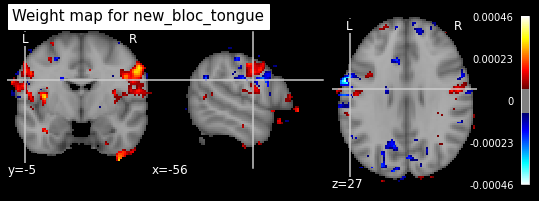

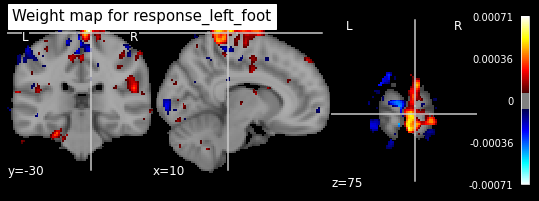

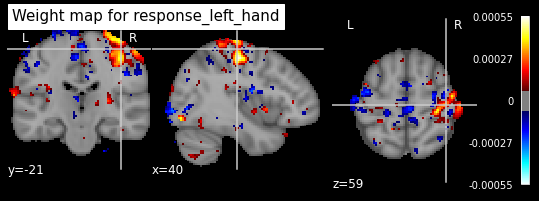

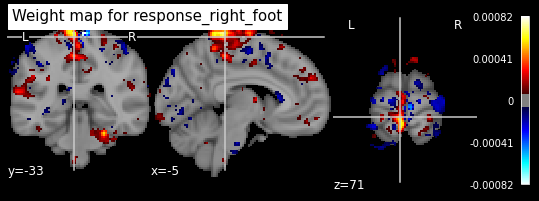

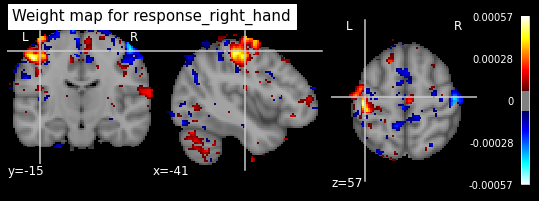

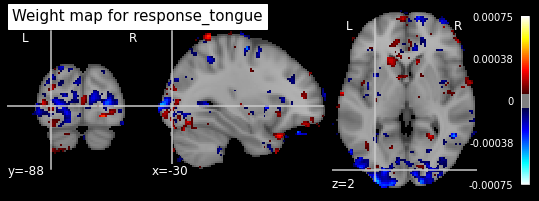

**Task: language**

presentation_math 0.93
presentation_story 0.98
question_math 0.87
question_story 0.93
response_math 0.93
response_story 0.93
mean value: 0.93 



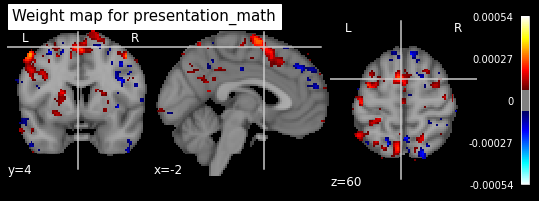

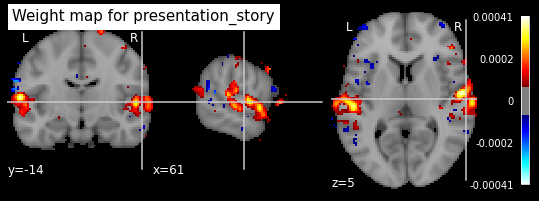

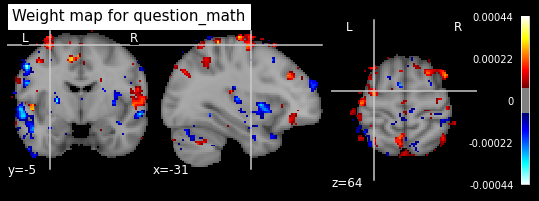

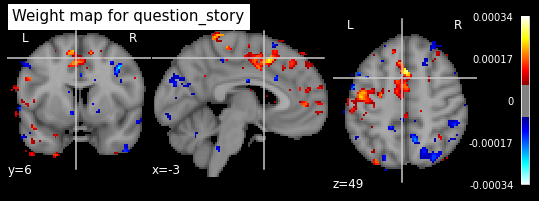

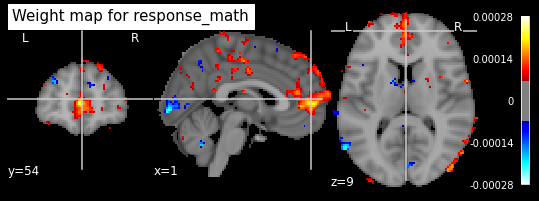

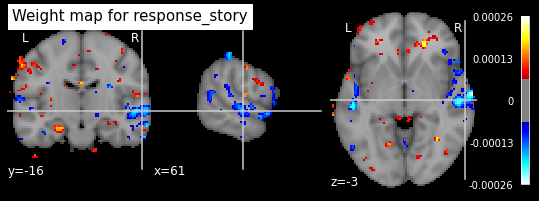

**Task: gambling**

Feedback 0.91
Neutral 0.8
Punishment 0.73
Reward 0.72
countdown 0.92
mean value: 0.82 



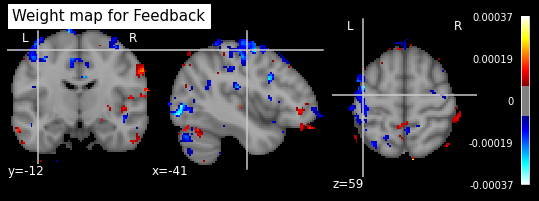

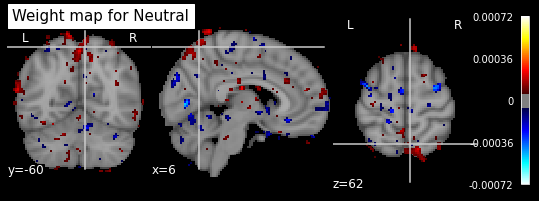

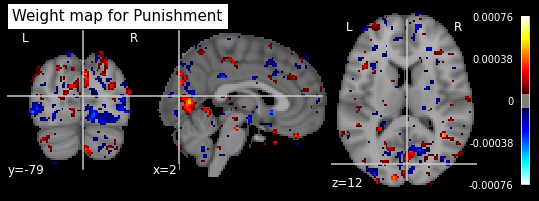

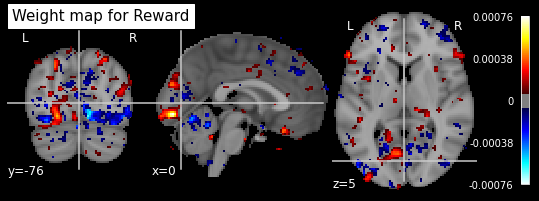

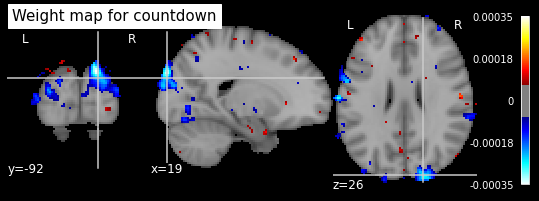

**Task: social**

Mental 0.91
Random 0.91
countdown 0.96
mean value: 0.93 



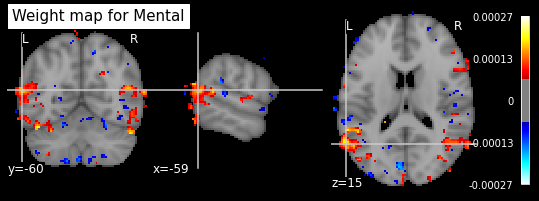

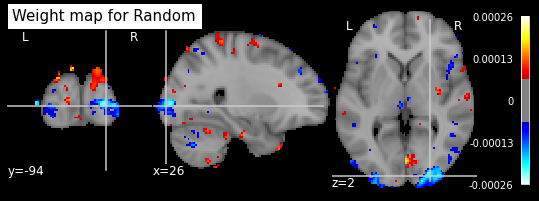

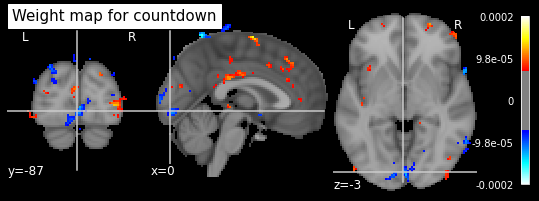

**Task: relational**

Control 0.91
Relational 0.9
countdown 0.99
new_bloc_control 0.87
new_bloc_relational 0.86
mean value: 0.91 



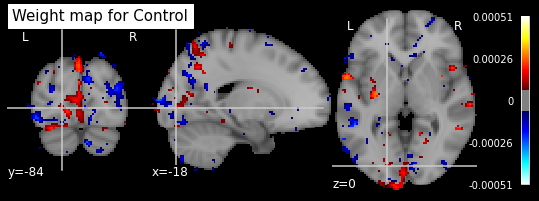

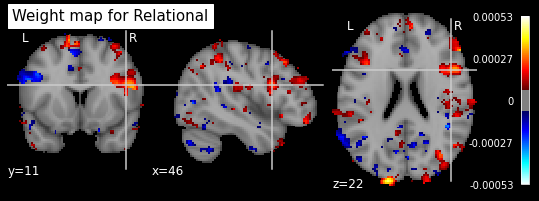

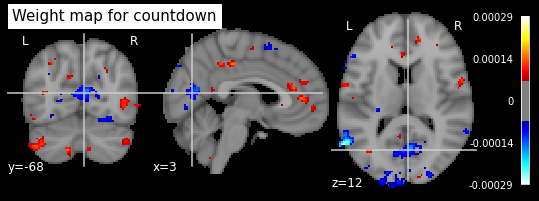

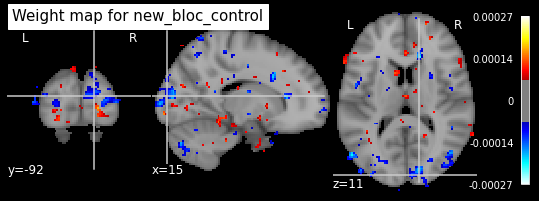

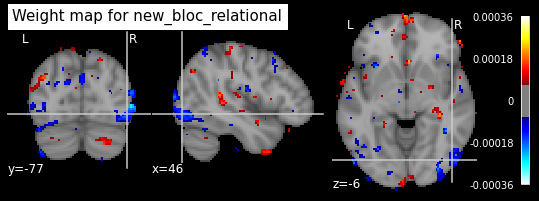

**Task: emotion**

countdown 0.93
new_bloc_face 0.89
new_bloc_shape 0.9
response_face 0.96
response_shape 0.86
mean value: 0.91 



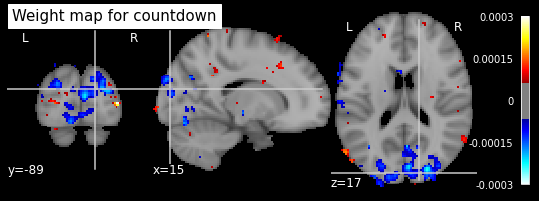

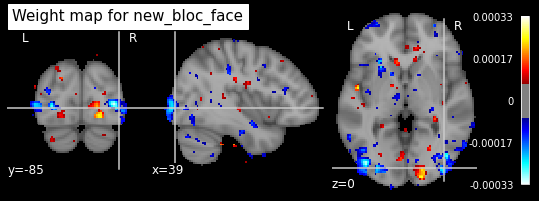

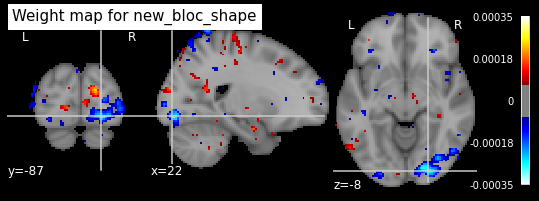

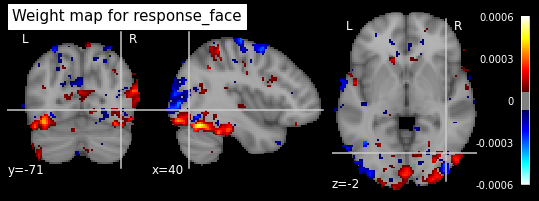

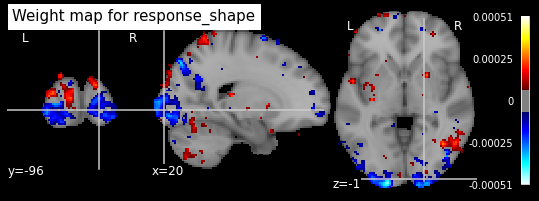

In [3]:
for task_label in task_labels:    
    
    mask_name = path + 'sub-01_ses-002_task-{}_run-2_space-MNI152NLin2009cAsym_desc-brain_mask.nii.gz'.format(task_label)
    event_file = path + 'sub-01_ses-002_task-{}_run-02_events.tsv'.format(task_label)
    utils.printmd('**Task: {}**'.format(task_label))
    
    # Read all conditions
    df = utils.new_conditions(path, event_file, task_label)
    conds = list(set(df.trial_type))

    # Generate beta maps
    utils.postproc_task(subject=subj, task_label=task_label, conditions=conds, tpl_mask=mask_name)
    
    # Decoder
    utils.check_decoding(task_dir, task_label, mask_name)